In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from math import isqrt
import pickle
from tqdm import tqdm
delim = ';'

user_count = 100
base_path = '/opt/iui-datarelease2-sose2021/'
Xpickle_file = './X.pickle'
ypickle_file = './y.pickle'
xshorted_pickle_file = './X_shorted.pickle'

In [2]:
def load_pickle():
    _p = open(xshorted_pickle_file, 'rb')
    X = pickle.load(_p)
    _p.close()
        
  
    
    return (np.asarray(X, dtype=pd.DataFrame))

In [3]:
def load_pickle_Y():

    _p = open(ypickle_file, 'rb')
    y = pickle.load(_p)
    _p.close()
    
    return ( np.asarray(y, dtype=str))

In [4]:
f_data = load_pickle()
y = load_pickle_Y()


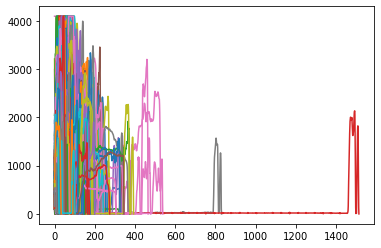

In [5]:
for i in range(0,len(f_data)):
    plt.plot(*f_data[i])

[[list([108.0, 362.0, 683.0, 994.0, 1306.0, 1380.0, 1526.0, 1724.0, 1895.0, 1985.0, 2077.0, 2040.0, 1997.0, 1917.0, 1623.0, 1357.0, 1087.0, 785.0, 450.0, 146.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 67.0, 615.0, 927.0, 1212.0, 1450.0, 1483.0, 1546.0, 1634.0, 1617.0, 1691.0, 1654.0, 1663.0, 1618.0, 1550.0, 1519.0, 1519.0, 1742.0, 1892.0, 1966.0, 1966.0, 2092.0, 2040.0, 2048.0, 1997.0, 1953.0, 1946.0, 1926.0, 1791.0, 1497.0, 1112.0, 678.0, 279.0, 0])]
 [list([464.0, 587.0, 824.0, 1016.0, 1156.0, 1285.0, 1454.0, 1603.0, 1728.0, 1851.0, 1921.0, 1963.0, 1952.0, 1872.0, 1742.0, 1631.0, 1641.0, 1629.0, 1628.0, 1668.0, 1696.0, 1765.0, 1803.0, 1879.0, 1879.0, 1859.0, 1812.0, 1738.0, 1683.0, 1678.0, 1698.0, 1722.0, 1741.0, 1783.0, 1769.0, 1758.0, 1752.0, 1750.0, 1710.0, 1668.0, 1673.0, 1694.0, 1705.0, 1687.0, 1594.0, 1447.0, 1398.0, 1303.0, 1220.0, 1172.0, 1183.0, 1203.0, 1280.0, 1364.0, 1420.0, 1433.0, 1409.0, 1386.0, 1490.0, 1658.0, 1725.0, 1807.0, 1869.0, 1904.0, 1929.0, 1918

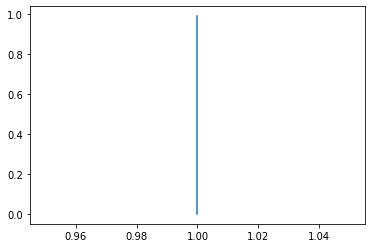

In [13]:


X_len = np.asarray(list(map(len, f_data)))


l = []
sq_xlen = pd.Series(X_len)
ptiles = [x*0.01 for x in range(100)]
for i in ptiles:
    l.append(sq_xlen.quantile(i))
    print(l)

sq_xlen.describe(percentiles=[x*0.01 for x in range(95,100)])


threshold_p = 0.99
threshold = int(sq_xlen.quantile(threshold_p))
len_mask = np.where(X_len <= threshold)

X_filter = f_data[len_mask]
y_filter = y[len_mask]
X_filter.shape, X_filter[0].shape

plt.plot(l, ptiles)